# Análise do Dataset Penguins pelo Seaborn

Esta análise tem como objetivo o aprofundamento e a exploração inicial (análise exploratória) do dataset Penguins, disponível na biblioteca Python Seaborn.

Para facilitar a compreensão, os nomes das colunas foram convertidos para o português (PT-BR).

| Coluna              | Tipo    | Descrição                                      |
| ------------------- | ------- | ---------------------------------------------- |
| `species`           | object  | Espécie do pinguim (Adelie, Chinstrap, Gentoo) |
| `island`            | object  | Ilha onde o pinguim foi observado              |
| `bill_length_mm`    | float64 | Comprimento do bico em mm                      |
| `bill_depth_mm`     | float64 | Profundidade do bico em mm                     |
| `flipper_length_mm` | float64 | Comprimento da nadadeira em mm                 |
| `body_mass_g`       | float64 | Peso do pinguim em gramas                      |
| `sex`               | object  | Sexo biológico (Male/Female)                   |




In [106]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm

# Configuração de estilo do Seaborn
sns.set(style="whitegrid")

In [107]:
# Informçoes sobre as colunas e dataset

penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [108]:
# Carregando dataset Penguins do Seaborn
penguins = sns.load_dataset("penguins")

# Visualizando as primeiras linhas
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Explorando os DADOS - Penguins Dataset


In [109]:
# explore data

penguins.describe(include='all')
 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


Alterando o nome das colunas

In [110]:
penguins.rename(columns={
    'species': 'especie',
    'island': 'ilha',
    'bill_length_mm': 'comprimento_bico_mm',
    'bill_depth_mm': 'profundidade_bico_mm',
    'flipper_length_mm': 'nadadeira_mm',
    'body_mass_g': 'peso_g',
    'sex': 'sexo'
}, inplace=True)


In [111]:
#count category 
print(penguins['especie'].value_counts())
print(penguins['ilha'].value_counts())
print(penguins['sexo'].value_counts())


especie
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
ilha
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sexo
Male      168
Female    165
Name: count, dtype: int64


In [112]:
#values null
# Contar valores nulos por coluna
print(penguins.isnull().sum())


especie                  0
ilha                     0
comprimento_bico_mm      2
profundidade_bico_mm     2
nadadeira_mm             2
peso_g                   2
sexo                    11
dtype: int64


## Visualização por dados


Analise das especies de peguins 

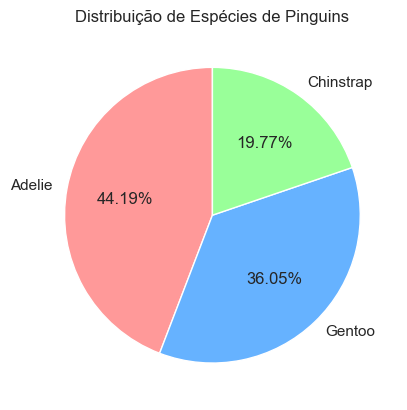

In [113]:



# Gráfico de pizza
especie.plot(kind='pie',
             autopct="%.2f%%",
             startangle=90,
             colors=['#FF9999','#66B2FF','#99FF99'])  # cores opcionais
plt.ylabel('')  # remove o label do eixo y
plt.title("Distribuição de Espécies de Pinguins")
plt.show()


Analise por sexo

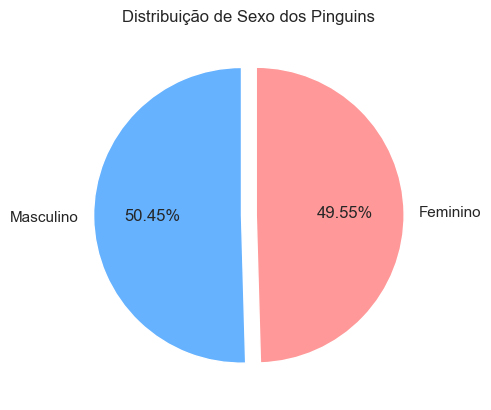

In [114]:
sexo.index = ['Masculino', 'Feminino']


# Gráfico de pizza
sexo.plot(kind='pie',
          autopct="%.2f%%",
          startangle=90,
          colors=['#66B2FF', '#FF9999'],  # cores opcionais
          explode=[0.05, 0.05])  # destaque das fatias
plt.ylabel('')  # remove o label do eixo y
plt.title("Distribuição de Sexo dos Pinguins")
plt.show()

In [115]:

sexo.value_counts()


count
168    1
165    1
Name: count, dtype: int64

#### Análise da Profundidade do Bico por Espécie e Sexo

A profundidade do bico nos pinguins é uma característica morfológica relevante, podendo influenciar hábitos alimentares e estratégias de captura de presas. Diferenças nessa medida podem refletir tanto variações adaptativas entre espécies quanto dimorfismo sexual.

Nesta análise, utilizou-se um boxplot para comparar a distribuição da profundidade do bico (em milímetros) entre as espécies Adelie, Chinstrap e Gentoo, segmentando os dados por sexo biológico. Essa abordagem permite identificar não apenas diferenças centrais (mediana), mas também a dispersão dos valores e possíveis outliers.

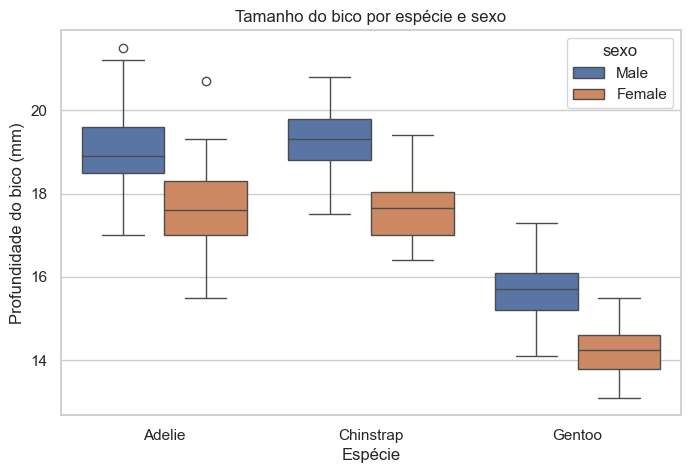

In [116]:
# Utilizando Boxplot
plt.figure(figsize=(8,5))

sns.boxplot(
    data=penguins,
    x="especie",
    y="profundidade_bico_mm",
    hue="sexo"
)

# Ajustando títulos dos eixos
plt.xlabel("Espécie")
plt.ylabel("Profundidade do bico (mm)")
plt.title("Tamanho do bico por espécie e sexo")

plt.show()


Observa-se que, em todas as espécies analisadas, os pinguins do sexo masculino tendem a apresentar profundidade do bico superior à das fêmeas. Esse padrão sugere a presença de dimorfismo sexual, possivelmente relacionado a diferenças na dieta, no comportamento de forrageamento ou em pressões seletivas específicas de cada espécie.

####   Relação entre Nadadeira e Peso

O comprimento da nadadeira é um importante indicador morfológico em pinguins, frequentemente associado à adaptação ao meio aquático e ao desempenho na natação. A massa corporal, por sua vez, está relacionada à condição física e ao porte do animal.

Nesta análise, foi elaborado um gráfico de dispersão que correlaciona essas duas variáveis, considerando a diferenciação por espécie e sexo biológico. O objetivo é verificar padrões de associação, diferenças morfológicas entre espécies e possíveis variações relacionadas ao sexo.

In [117]:
#Analise Scatterplot:

fig = px.scatter(
    penguins,
    x="nadadeira_mm",
    y="peso_g",
    color="especie",
    symbol="sexo",
    title="Relação: Nadadeira vs Peso",
    labels={"nadadeira_mm": "Tamanho da nadadeira (mm)", "peso_g": "Peso (g)"}
)
fig.show()




A análise de dispersão indica que, de forma geral, pinguins com maior comprimento de nadadeira tendem a apresentar maior massa corporal.

Observa-se que a espécie Gentoo concentra-se nas faixas mais elevadas de comprimento de nadadeira e peso, situando-se acima da média geral para ambas as variáveis. Em contraste, as espécies Chinstrap e Adelie apresentam medidas menores, tanto em nadadeira quanto em peso. Nota-se todo momento que Penguins do sexo masculino tem o tamanho da nadadeira maiores e também peso.

Ao estratificar por sexo, verifica-se que machos tendem a ocupar as posições superiores em peso dentro de cada espécie, embora exista sobreposição com fêmeas em determinadas faixas.

#### Historograma por peso 

Realizou-se a análise da distribuição de frequência da massa corporal dos pinguins, estratificada por sexo biológico (Male = Masculino; Female = Feminino).

Os resultados indicam que valores acima de 5.000 g (5 kg) ocorrem majoritariamente entre indivíduos do sexo masculino. Para o sexo feminino, a distribuição apresenta variação entre ~3.000 g (3 kg) e pouco acima de 5.000 g (5 kg).

Observou-se ainda que, na classe de peso centrada em 4.000 g (4 kg), a ocorrência é exclusiva de indivíduos do sexo masculino.




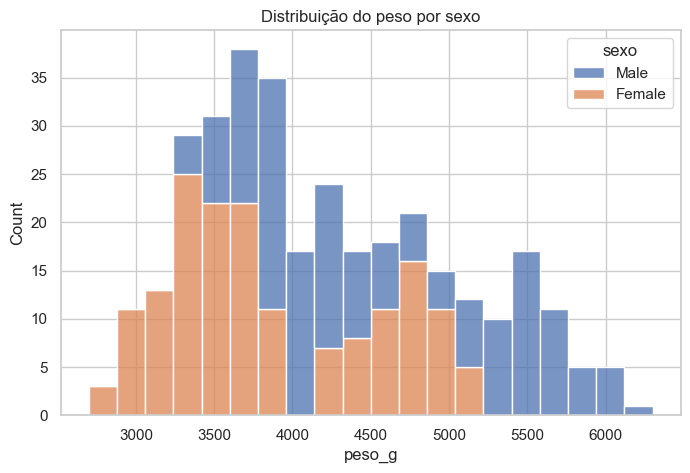

In [118]:
plt.figure(figsize=(8,5))
sns.histplot(data=penguins, x="peso_g", hue="sexo", multiple="stack", bins=20)
plt.title("Distribuição do peso por sexo")
plt.show()



### O tamanho da nadadeira influencia o peso do pinguim?
Existe uma relação forte e positiva entre o tamanho da nadadeira e o peso do pinguim.
Cada mm a mais na nadadeira acrescenta cerca de 50 g ao peso.
O modelo explica aproximadamente 76% da variação do peso, e essa relação é estatisticamente significativa.


In [119]:

X = penguins["nadadeira_mm"]
y = penguins["peso_g"]
X = sm.add_constant(X)  # adiciona intercepto

modelo = sm.OLS(y, X, missing='drop').fit()
print(modelo.summary())



                            OLS Regression Results                            
Dep. Variable:                 peso_g   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1071.
Date:                Fri, 15 Aug 2025   Prob (F-statistic):          4.37e-107
Time:                        21:27:01   Log-Likelihood:                -2528.4
No. Observations:                 342   AIC:                             5061.
Df Residuals:                     340   BIC:                             5069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5780.8314    305.815    -18.903   

#### O gráfico 3D interativo permite visualizar simultaneamente três medidas corporais dos pinguins.
Observa-se que os Gentoo tendem a ter nadadeiras maiores, pesos mais altos e bicos mais longos, diferenciando-se claramente de Adelie e Chinstrap.
O uso de cores e símbolos facilita a identificação de diferenças entre espécies e sexo, enquanto o tamanho dos pontos evidencia variações no peso.
Essa visualização auxilia na análise de dimorfismo sexual, padrões de crescimento e classificação de espécies.

In [120]:
import plotly.express as px
import seaborn as sns

# Carregar dataset
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna(subset=['flipper_length_mm', 'body_mass_g', 'bill_length_mm', 'species', 'sex'])

# Gráfico 3D interativo
fig = px.scatter_3d(
    penguins,
    x="flipper_length_mm",
    y="body_mass_g",
    z="bill_length_mm",
    color="species",
    symbol="sex",
    size="body_mass_g",
    title="Gráfico 3D: Nadadeira × Peso × Comprimento do Bico",
    labels={
        "flipper_length_mm": "Nadadeira (mm)",
        "body_mass_g": "Peso (g)",
        "bill_length_mm": "Comprimento do bico (mm)"
    }
)

# Aumentar tamanho do gráfico
fig.update_layout(
    width=1000,
    height=800,
    scene=dict(
        xaxis_title='Nadadeira (mm)',
        yaxis_title='Peso (g)',
        zaxis_title='Comprimento do bico (mm)'
    ),
    legend_title='Espécie'
)

fig.show()


### Analise descritiva 

O que cada linha significa

count → quantidade de valores não nulos na coluna.

mean → média aritmética dos valores.

std → desvio padrão (medida de dispersão).

min → valor mínimo.

25% / 50% / 75% → quartis, mostrando a distribuição dos dados.

max → valor máximo.


In [121]:
penguins.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000
